# Assignment 1 - KMeans - Kieran Gregg

# Dataset 2 (historical-weather)



### PART ONE : EDA

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import pandas as pd

df = pd.read_csv("historical-weather.csv")
corr = df.corr()
corr

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
rowID,1.000000,-0.055187,0.161720,0.034375,-0.033324,0.034986,-0.035930,0.024965,-0.032722,-0.021604,-0.031339,-0.028147
air_pressure,-0.055187,1.000000,0.046296,-0.197714,-0.077352,-0.217877,-0.060287,-0.142218,-0.094720,-0.080481,-0.112794,-0.375241
air_temp,0.161720,0.046296,1.000000,-0.014719,-0.209340,-0.046445,-0.209983,0.025727,-0.201580,-0.059231,-0.113693,-0.620038
avg_wind_direction,0.034375,-0.197714,-0.014719,1.000000,-0.027794,0.715839,-0.028626,0.621677,-0.031545,0.015005,0.025888,0.206526
avg_wind_speed,-0.033324,-0.077352,-0.209340,-0.027794,1.000000,0.022464,0.985016,-0.114903,0.971058,0.089419,0.091910,0.059483
max_wind_direction,0.034986,-0.217877,-0.046445,0.715839,0.022464,1.000000,0.021483,0.421736,0.015318,0.018410,0.036116,0.239168
max_wind_speed,-0.035930,-0.060287,-0.209983,-0.028626,0.985016,0.021483,1.000000,-0.110048,0.926046,0.088740,0.097858,0.047763
min_wind_direction,0.024965,-0.142218,0.025727,0.621677,-0.114903,0.421736,-0.110048,1.000000,-0.118068,0.004749,0.007557,0.133838
min_wind_speed,-0.032722,-0.094720,-0.201580,-0.031545,0.971058,0.015318,0.926046,-0.118068,1.000000,0.076147,0.074413,0.071531
rain_accumulation,-0.021604,-0.080481,-0.059231,0.015005,0.089419,0.018410,0.088740,0.004749,0.076147,1.000000,0.553623,0.067226


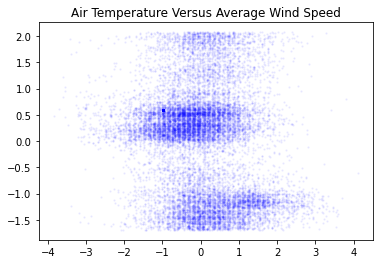

In [3]:
df.dropna(inplace=True)

df = df.iloc[0:,[2,4]]

from sklearn.preprocessing import StandardScaler

array = df.values
array = StandardScaler().fit_transform(array)

# the figure printed below plots the weather dataset
plt.scatter(array[:, 0], array[:, 1], c="b", s=2, alpha=0.05)
plt.title("Air Temperature Versus Average Wind Speed")
plt.show()

### PART TWO : Implement KMeans

In [4]:
num_clusters = 3

In [5]:
# running the built in KMeans algorithm on our blobs dataset, with 3 clusters
kmeans = KMeans(n_clusters=num_clusters).fit(array)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [6]:
# Running my Java Kmeans
import os

array_df = pd.DataFrame(array)
array_df.to_csv("weather.csv", header=None, index=False)

input_path = "weather.csv"
labels_output_path = "weather_labels_output.csv"
centers_output_path = "weather_centers_output.csv"
random_state = 42
num_centroids = num_clusters
num_max_iterations = 100

cwd = os.getcwd()
os.chdir(cwd)
os.system('javac KMeans.java')   
run_command = "java " + "KMeans " + input_path + " " + labels_output_path + " " + centers_output_path + " " + str(random_state) + " " + str(num_centroids) + " " + str(num_max_iterations) 
os.system(run_command)

args [weather.csv, weather_labels_output.csv, weather_centers_output.csv, 42, 3, 100]

centroid: 0 at coordinates: 0.563122354607542, -1.139778528629221
centroid: 1 at coordinates: -1.0496158954225228, 0.24516485861656823
centroid: 2 at coordinates: 0.31975260445506853, 0.8795721358731245

centroid: 0 at coordinates: 0.6166378098585413, -1.1997633936103724
centroid: 1 at coordinates: -1.0254752398424154, 0.25965761116307984
centroid: 2 at coordinates: 0.3828207397697056, 0.8259856905211898

centroid: 0 at coordinates: 0.625967443986313, -1.2128601123107017
centroid: 1 at coordinates: -1.009539141843813, 0.26600095477473806
centroid: 2 at coordinates: 0.40571199127296265, 0.815707695120794

centroid: 0 at coordinates: 0.6258941077641691, -1.215848166954092
centroid: 1 at coordinates: -0.999086191404624, 0.2714984443174452
centroid: 2 at coordinates: 0.41814680462303866, 0.8160423518334649

centroid: 0 at coordinates: 0.6242081017866407, -1.2162560659402715
centroid: 1 at coordinates: -0

0

### PART THREE : Comparing Implemented KMeans to Sklearn's KMeans

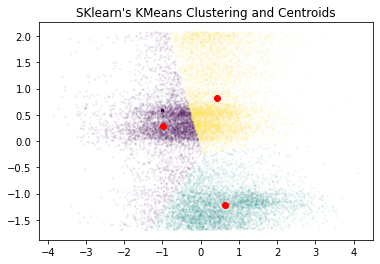

In [7]:
# plotting the blobs dataset 
plt.scatter(array[:,0], array[:,1], s=2, c=labels, alpha=0.05)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(centers[:,0], centers[:,1], color='red')

plt.title("SKlearn's KMeans Clustering and Centroids")
plt.show()

In [8]:
output_labels = pd.read_csv("weather_labels_output.csv", header=None)
output_labels_ndarray = output_labels.to_numpy().flatten()
output_labels_ndarray

array([1, 1, 1, ..., 2, 0, 2])

In [9]:
labels

array([0, 0, 0, ..., 2, 1, 2], dtype=int32)

In [10]:
from sklearn.metrics import v_measure_score

score = v_measure_score(labels, output_labels_ndarray)
score

0.9882099497935355

In [11]:
output_centers = pd.read_csv("weather_centers_output.csv", header=None)
output_centers_ndarray = output_centers.to_numpy()
output_centers_ndarray

array([[ 0.62237956, -1.21604898],
       [-0.98206169,  0.27943297],
       [ 0.43420124,  0.82403333]])

In [12]:
centers

array([[-0.97623492,  0.27836079],
       [ 0.6236874 , -1.21573386],
       [ 0.43867014,  0.82817675]])

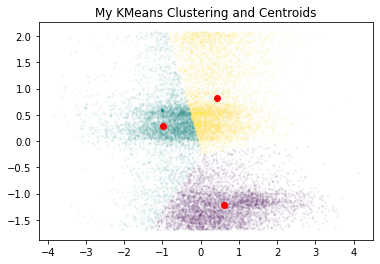

In [13]:
# plotting the blobs dataset 
plt.scatter(array[:,0], array[:,1], s=2, c=output_labels_ndarray, alpha=0.05)
# plotting the centers of our cluster from sklearn's kmeans
plt.scatter(output_centers_ndarray[:,0], output_centers_ndarray[:,1], color='red')

plt.title("My KMeans Clustering and Centroids")
plt.show()